In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
from matplotlib import cm  # color map
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from sklearn import metrics
from scipy.linalg import eigh

## 1) PCA on Boston Housing Dataset

## 1.a) Load The Dataset

In [141]:
boston_dataset = load_boston()
csvfile = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
y = boston_dataset.target
csvfile.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 1.b) Standardizing The Dataset

In [142]:
# fitting dataset into standardscaler
snd = StandardScaler().fit_transform(csvfile)

## 1.c) Covarience 

In [143]:
# covarience matrix cov = X.T*X
cov = np.matmul(snd.T,snd)
# finding top two eigen values and corresponding eigen vectors using scipy.linalg by importing eigh
values , vectors = eigh(cov,eigvals=(11,12))
# for matrix multiplication change shape of vectors from 13*2 to 2*13
vectors = vectors.T

## 1.d) Principal Component

In [144]:
# matrix multiplication of vectors(2*13) to snd transpose size (13*506)
project= np.matmul(vectors,snd.T)
# appending target to projected new 
new = np.vstack((project,y)).T
# creating new dataframe
df = pd.DataFrame(data=new,columns=("1 principal","2 principal","target"))
print(df)

     1 principal  2 principal  target
0      -0.773113    -2.098297    24.0
1      -0.591985    -1.457252    21.6
2      -0.599639    -2.074598    34.7
3       0.006871    -2.611504    33.4
4      -0.097712    -2.458185    36.2
..           ...          ...     ...
501    -0.724285    -0.314968    22.4
502    -0.759308    -0.110513    20.6
503    -1.155246    -0.312360    23.9
504    -1.041362    -0.270519    22.0
505    -0.761978    -0.125803    11.9

[506 rows x 3 columns]


## 1.e) Visualization

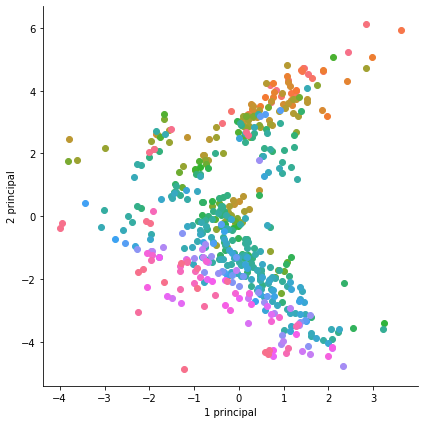

In [145]:
# seaborn plot of new projected dataframe
sns.FacetGrid(df,hue = "target",height=6).map(plt.scatter,'1 principal','2 principal')
plt.show()

## 2) KNN On Boston Housing Dataset

## 2.a) Load The Dataset

In [155]:
boston_data = load_boston()
df = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 2.b) Root Mean Square 

In [147]:
def compute_rmse(predictions, yvalues):
    error_sq = (predictions - yvalues)**2
    error_sq = error_sq.sum()
    rmse = np.sqrt(error_sq/float(len(predictions)))
    return rmse

In [148]:
def distance(x1, x2):
    sqr = (x1-x2)**2
    dista = sqr.sum(axis = 1)
    return np.array(dista)

## 2.c) Spliting dataset

In [156]:
np.random.seed(seed=13579)
# int(len(bdata.target)*0.66)

# Function to randomly split the data into test and train
def random_split(data, target, per_train):
    data = np.insert(data, data.shape[1],target, axis = 1)
    np.random.shuffle(data)
    train = data[0:int(per_train*len(target)),:]
    test = data[int(per_train*len(target)):len(target),:]
    return train, test, data

# Create train, test and entire dataset using the random_split function
bdata_train, bdata_test, data = random_split(boston_data.data, boston_data.target, 0.66)

## 2.d) Normalization

In [157]:
# min max normalization
def normalize(raw_data, mn):
    normalized_data = (raw_data-mn)/float(np.max(raw_data)-np.min(raw_data))
    return normalized_data

# Function we will use in our analysis
def normalize2(raw_data):
    normalized_data = (raw_data-np.min(raw_data))/float(np.max(raw_data)-np.min(raw_data))
    return normalized_data

In [158]:
# Normalizing entire dataset for future use
norm_data = np.vstack((normalize2(bdata.data[:,0]), normalize2(bdata.data[:,1]), normalize2(bdata.data[:,2]),
                     normalize2(bdata.data[:,3]), normalize2(bdata.data[:,4]), normalize2(bdata.data[:,5]), 
                     normalize2(bdata.data[:,6]), normalize2(bdata.data[:,7]), normalize2(bdata.data[:,8]),
                     normalize2(bdata.data[:,9]), normalize2(bdata.data[:,10]), normalize2(bdata.data[:,11]),
                     normalize2(bdata.data[:,12]), (bdata.target))).T

## 2.e) Neighbour

In [175]:
def neighbor(train, test, col_num, target, k=1):
    final = []
    for i in range(len(test)):
        dist = distance(train[:,col_num], test[i,col_num])        
        dist = dist[:, np.newaxis]
        dist2 = np.append(dist, train[:,target],1)
        
        sortd = dist2[np.argsort(dist2[:,0]),:][0]  
        final.append(sortd)
    
    neigh = np.array(final)
    final = np.append(neigh, test[:, target], axis = 1)
    rmse = compute_rmse(final[:,1], final[:,2])
    return rmse
print("neighbours are ",neighbor(bdata_train, bdata_test,[0,5],[13]))
# Calulating the normalized values of test and train data
test = np.vstack((normalize2(bdata_test[:,0]),normalize2(bdata_test[:,5]),(bdata_test[:,13]))).T
train = np.vstack((normalize2(bdata_train[:,0]),normalize2(bdata_train[:,5]),(bdata_train[:,13]))).T
z = neighbor(train, test, [0,1], [2])
print( ' input based on nearest neighborsn algorithm: ', z)

neighbours are  7.408493797447684
 input based on nearest neighborsn algorithm:  10.741330689030027


In [176]:
test= np.vstack((normalize2(bdata_test[:,12]), normalize2(bdata_test[:,0]),
                  normalize2(bdata_test[:,5]),normalize2(bdata_test[:,6]),normalize2(bdata_test[:,9]),
                  (bdata_test[:,13]))).T
train= np.vstack((normalize2(bdata_train[:,12]),normalize2(bdata_train[:,0]),
                    normalize2(bdata_train[:,5]),normalize2(bdata_train[:,6]),normalize2(bdata_train[:,9]),
                    (bdata_train[:,13]))).T
print( neighbor(train, test, [0,1,2,3,4], [5], 2))
print( neighbor(train, test, [0,1,2,3,4], [4], 3))


6.556107332297204
0.06360185087672764


## 2.f) KNN

In [181]:
def knn(train, test, col_num, target, K):
    final1 = []
    for j in range(len(test)):
        dist = distance(train[:,col_num], test[j,col_num])        
        dist = dist[:, np.newaxis]
        dist2 = np.append(dist, train[:,target],1)
        sortd = dist2[np.argsort(dist2[:,0]),:]
        final1.append(np.mean(sortd[0:K], axis = 0))
    f_arr = np.array(final1)
    final = np.append(f_arr, test[:,target],1)
    rmse = compute_rmse(final[:,1], final[:,2])
    return rmse
print("knn for testing dataset ", knn(bdata_train, bdata_test, [0,5], [13], 3))
 

knn for testing dataset  6.642185783654786
